In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =  pd.read_csv("./Lead Scoring Assignment/Leads.csv")

In [3]:
data1 = pd.read_csv("./Leads.csv")
orig_row = data1.shape[0]
print(orig_row)

9240


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
data.shape 

(9240, 37)

In [7]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.

data = data.replace('Select', np.nan)

In [8]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# calcuate % null values in each column

In [10]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#lead type has 74% and how did you hear about x education has 78% null values including the select values. hence we  drop these cloumns

In [12]:
data.drop(['Lead Profile'], axis = 1,inplace  = True)

In [13]:
data.drop(['How did you hear about X Education'], axis = 1,inplace  = True)

In [14]:
a = round(100*(data.isnull().sum()/len(data.index)), 2)


In [15]:
a.sort_values(axis = 0)

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Search                                            0.00
Newspaper Article                                 0.00
Last Notable Activity                             0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Ema

In [16]:
#let's fill in the null values one by one

In [17]:
# Lead Quality
data['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

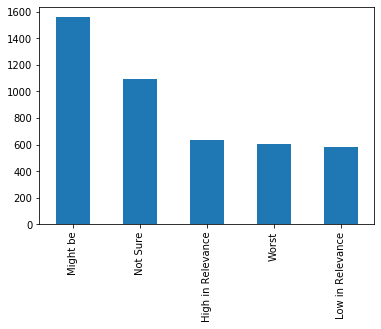

In [19]:
df = data['Lead Quality'].value_counts()
df.plot.bar()
plt.show()

In [20]:
# the values are na cause they might not be sure

In [21]:
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

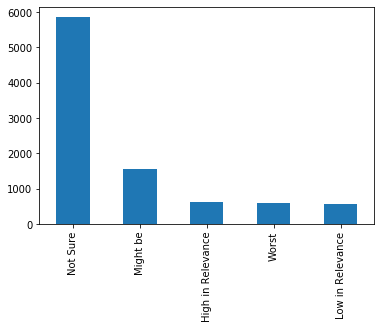

In [22]:
df = data['Lead Quality'].value_counts()
df.plot.bar()
plt.show()

In [23]:
data['Asymmetrique Profile Score'].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

In [24]:
a = data['Asymmetrique Profile Score'].mean()
print(a)

16.344882516925527


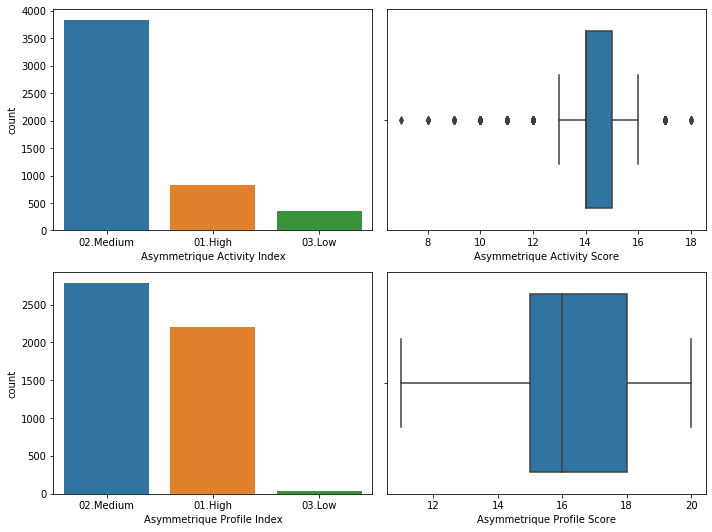

In [25]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [26]:
# 45% data is missing from the assymertic indexes.
# aslo we can see from the plots that there is huge variation in all of these.
# therefore we can't find suitable value to fill the null values and hence we drop these columns.

In [27]:
data.drop(['Asymmetrique Activity Index'], axis = 1,inplace  = True)
data.drop(['Asymmetrique Profile Index'], axis = 1,inplace  = True)
data.drop(['Asymmetrique Activity Score'], axis = 1,inplace  = True)
data.drop(['Asymmetrique Profile Score'], axis = 1,inplace  = True)

In [28]:
data.shape

(9240, 31)

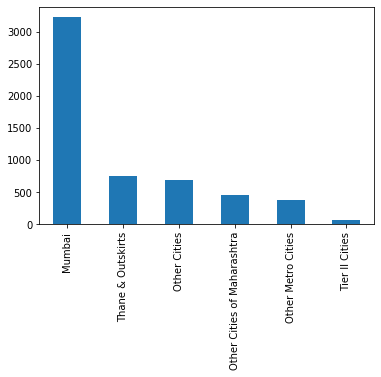

In [29]:
df = data['City'].value_counts()
df.plot.bar()
plt.show()

In [30]:
data['City'] = data['City'].replace(np.nan, 'Other Cities')

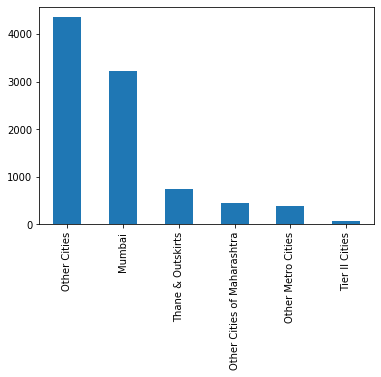

In [31]:
df = data['City'].value_counts()
df.plot.bar()
plt.show()

In [32]:
# Specialisation
data['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

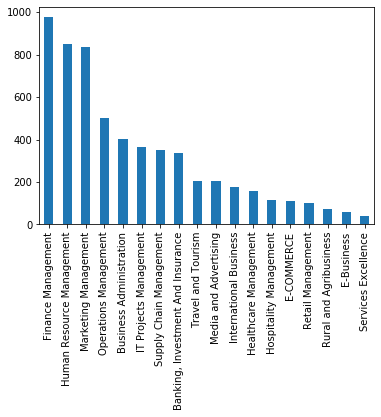

In [33]:
df = data['Specialization'].value_counts()
df.plot.bar()
plt.show()

In [34]:
# the specailisation may not be available ... hence let's fill nan with others.
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [35]:
data['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

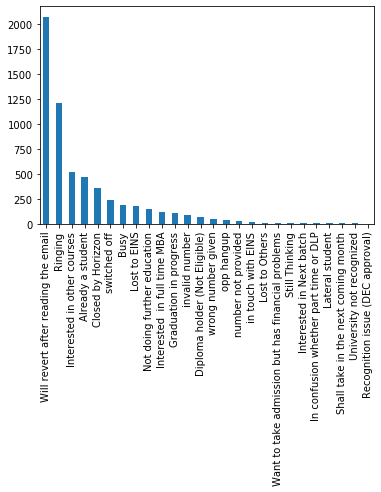

In [36]:
df = data['Tags'].value_counts()
df.plot.bar()
plt.show()

In [37]:
# most selected tag is will revert after reading the mail. That makes sense too. 
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [38]:
df = data['What matters most to you in choosing a course'].value_counts()
print(df)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


In [39]:
#clearly Better career prospects have been chosen by most of the people
# since it has only better career prsospets, we choose to drop this column, as it doesnt provide any additonal info
data.drop(['What matters most to you in choosing a course'], axis = 1,inplace  = True)

In [40]:
#Occupation
df = data['What is your current occupation'].value_counts()
print(df)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [41]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [42]:
df = data['Country'].value_counts()
print(df)

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Nigeria                    4
Canada                     4
Sweden                     3
Italy                      2
China                      2
Asia/Pacific Region        2
Netherlands                2
Belgium                    2
Philippines                2
Uganda                     2
Ghana                      2
Bangladesh                 2
Russia                     1
Sri Lanka                  1
Malaysia                   1
Kenya                      1
Denmark                    1
Tanzania                   1
Liberia       

In [43]:
data['Country'] = data['Country'].replace(np.nan, 'India')
data['Country'] = data['Country'].replace(['Singapore','Saudi Arabia','Saudi Arabia','United Kingdom','Australia','Qatar','Bahrain',
                                           'Hong Kong','Oman','France','unknown','South Africa','Canada','Kuwait','Nigeria','Germany',
                                           'Sweden','Ghana','China','Bangladesh','Philippines','Italy','Uganda','Asia/Pacific Region',
                                           'Belgium','Netherlands','Indonesia','Vietnam','Malaysia','Russia','Sri Lanka','Switzerland',
                                           'Denmark','Tanzania','Liberia','Kenya'],'Other_Country')

In [44]:
df = data['Country'].value_counts()
print(df)

India                   8953
Other_Country            165
United States             69
United Arab Emirates      53
Name: Country, dtype: int64


In [45]:
#Lead Source, Last Activity, Page views per Visit, Total Visits have less than 1.5% nan. 
#Therefore we can drop the null vlaue rows as it won't lead to data loss.
a = round(100*(data.isnull().sum()/len(data.index)), 2)
a.sort_values(axis = 0)

Prospect ID                                 0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Lead Quality                                0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Magazine                                    0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Country                                     0.00
Total Time Spent on Website                 0.00
Converted                                   0.00
Do Not Call         

In [46]:
data.dropna(inplace = True)

In [47]:
a = round(100*(data.isnull().sum()/len(data.index)), 2)
a.sort_values(axis = 0)

Prospect ID                                 0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Lead Quality                                0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [48]:
#check for duplicates
data.loc[data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [49]:
data.shape

(9074, 30)

In [50]:
# retention of data
print(100*data.shape[0]/orig_row)

98.2034632034632


In [51]:
#hence 98.20% data is maintianed.

Data Visualisation

In [52]:
pd.set_option('display.max_columns',None)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other Cities,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other Cities,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [53]:
#convert No to 0 and yes to 1
#varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspapaer Article', 'X Education Forums', 'Newspaper']
data = data.replace('No', 0)


In [54]:
data = data.replace('Yes', 1)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   int64  
 5   Do Not Call                               9074 non-null   int64  
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [56]:
data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import'],
      dtype=object)

In [57]:
data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [58]:
# Google and google is same 
# Welearn and welearnblog_home same and have very less count 
df = data['Lead Source'].value_counts()
print(df)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
testone                 1
youtubechannel          1
NC_EDM                  1
blog                    1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64


In [59]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [60]:
df = data['Lead Source'].value_counts()
print(df)

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64


In [61]:
df = data['Last Activity'].value_counts()
print(df)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


In [62]:
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [63]:
df = data['Last Activity'].value_counts()
print(df)

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_Activity                 42
Name: Last Activity, dtype: int64


In [64]:
df = data['What is your current occupation'].value_counts()
print(df)

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


In [65]:
data.rename(columns = {'What is your current occupation':'Occupation'},inplace = True)

In [66]:
data['Occupation'] = data['Occupation'].replace(['Housewife','Businessman','Other'],'Other Occupation')

In [67]:
df = data['Occupation'].value_counts()
print(df)

Unemployed              8159
Working Professional     677
Student                  206
Other Occupation          32
Name: Occupation, dtype: int64


In [68]:
#last Activity and Last Notable Activity are same
data.drop(['Last Notable Activity'],axis =1, inplace = True)

In [69]:
df = data['Tags'].value_counts()
print(df)

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [70]:
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [71]:
data['Tags'] = data['Tags'].replace(['invalid number'],'wrong number given')

In [72]:
df = data['Tags'].value_counts()
print(df)

Will revert after reading the email    5343
Ringing                                1187
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
Other_Tags                              281
switched off                            240
Busy                                    185
Lost to EINS                            172
Not doing further education             145
wrong number given                      130
Interested  in full time MBA            116
Name: Tags, dtype: int64


In [73]:
df = data['Lead Quality'].value_counts()
print(df)

Not Sure             5806
Might be             1519
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   int64  
 5   Do Not Call                               9074 non-null   int64  
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [75]:
data.nunique()

Prospect ID                                 9074
Lead Number                                 9074
Lead Origin                                    4
Lead Source                                    9
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 11
Country                                        4
Specialization                                19
Occupation                                     4
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendati

In [76]:
#lead Number and Prospect Id both are unique keys for data. Therefore dropping Lead NUmber
#dropping variables that have only 1 unique value
data.drop(['Magazine'], axis = 1,inplace  = True)
data.drop(['Receive More Updates About Our Courses'], axis = 1,inplace  = True)
data.drop(['Update me on Supply Chain Content'], axis = 1,inplace  = True)
data.drop(['Get updates on DM Content'], axis = 1,inplace  = True)
data.drop(['I agree to pay the amount through cheque'], axis = 1,inplace  = True)

In [77]:
data.shape

(9074, 24)

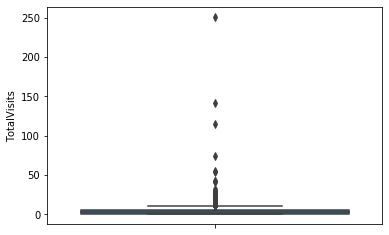

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
85%         6.000000
90%         7.000000
95%        10.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64


In [78]:
#visulaising numeric variables and removing outliers
sns.boxplot(y=data.TotalVisits)
plt.show()
print(data.TotalVisits.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,1]))

In [79]:
#removing outliers
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

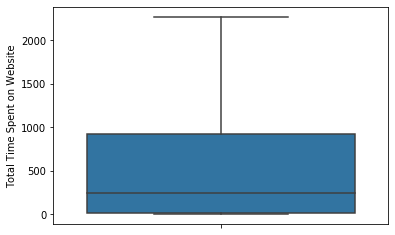

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
85%      1226.000000
90%      1373.000000
95%      1557.000000
100%     2272.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


In [80]:
sns.boxplot(y=data["Total Time Spent on Website"])
plt.show()
print(data["Total Time Spent on Website"].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,1]))

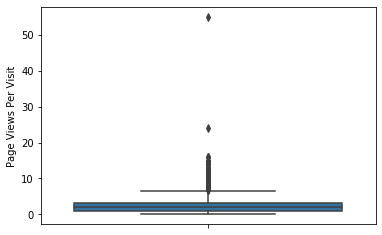

In [81]:
sns.boxplot(y = data['Page Views Per Visit'])

In [82]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

Data Visualisation

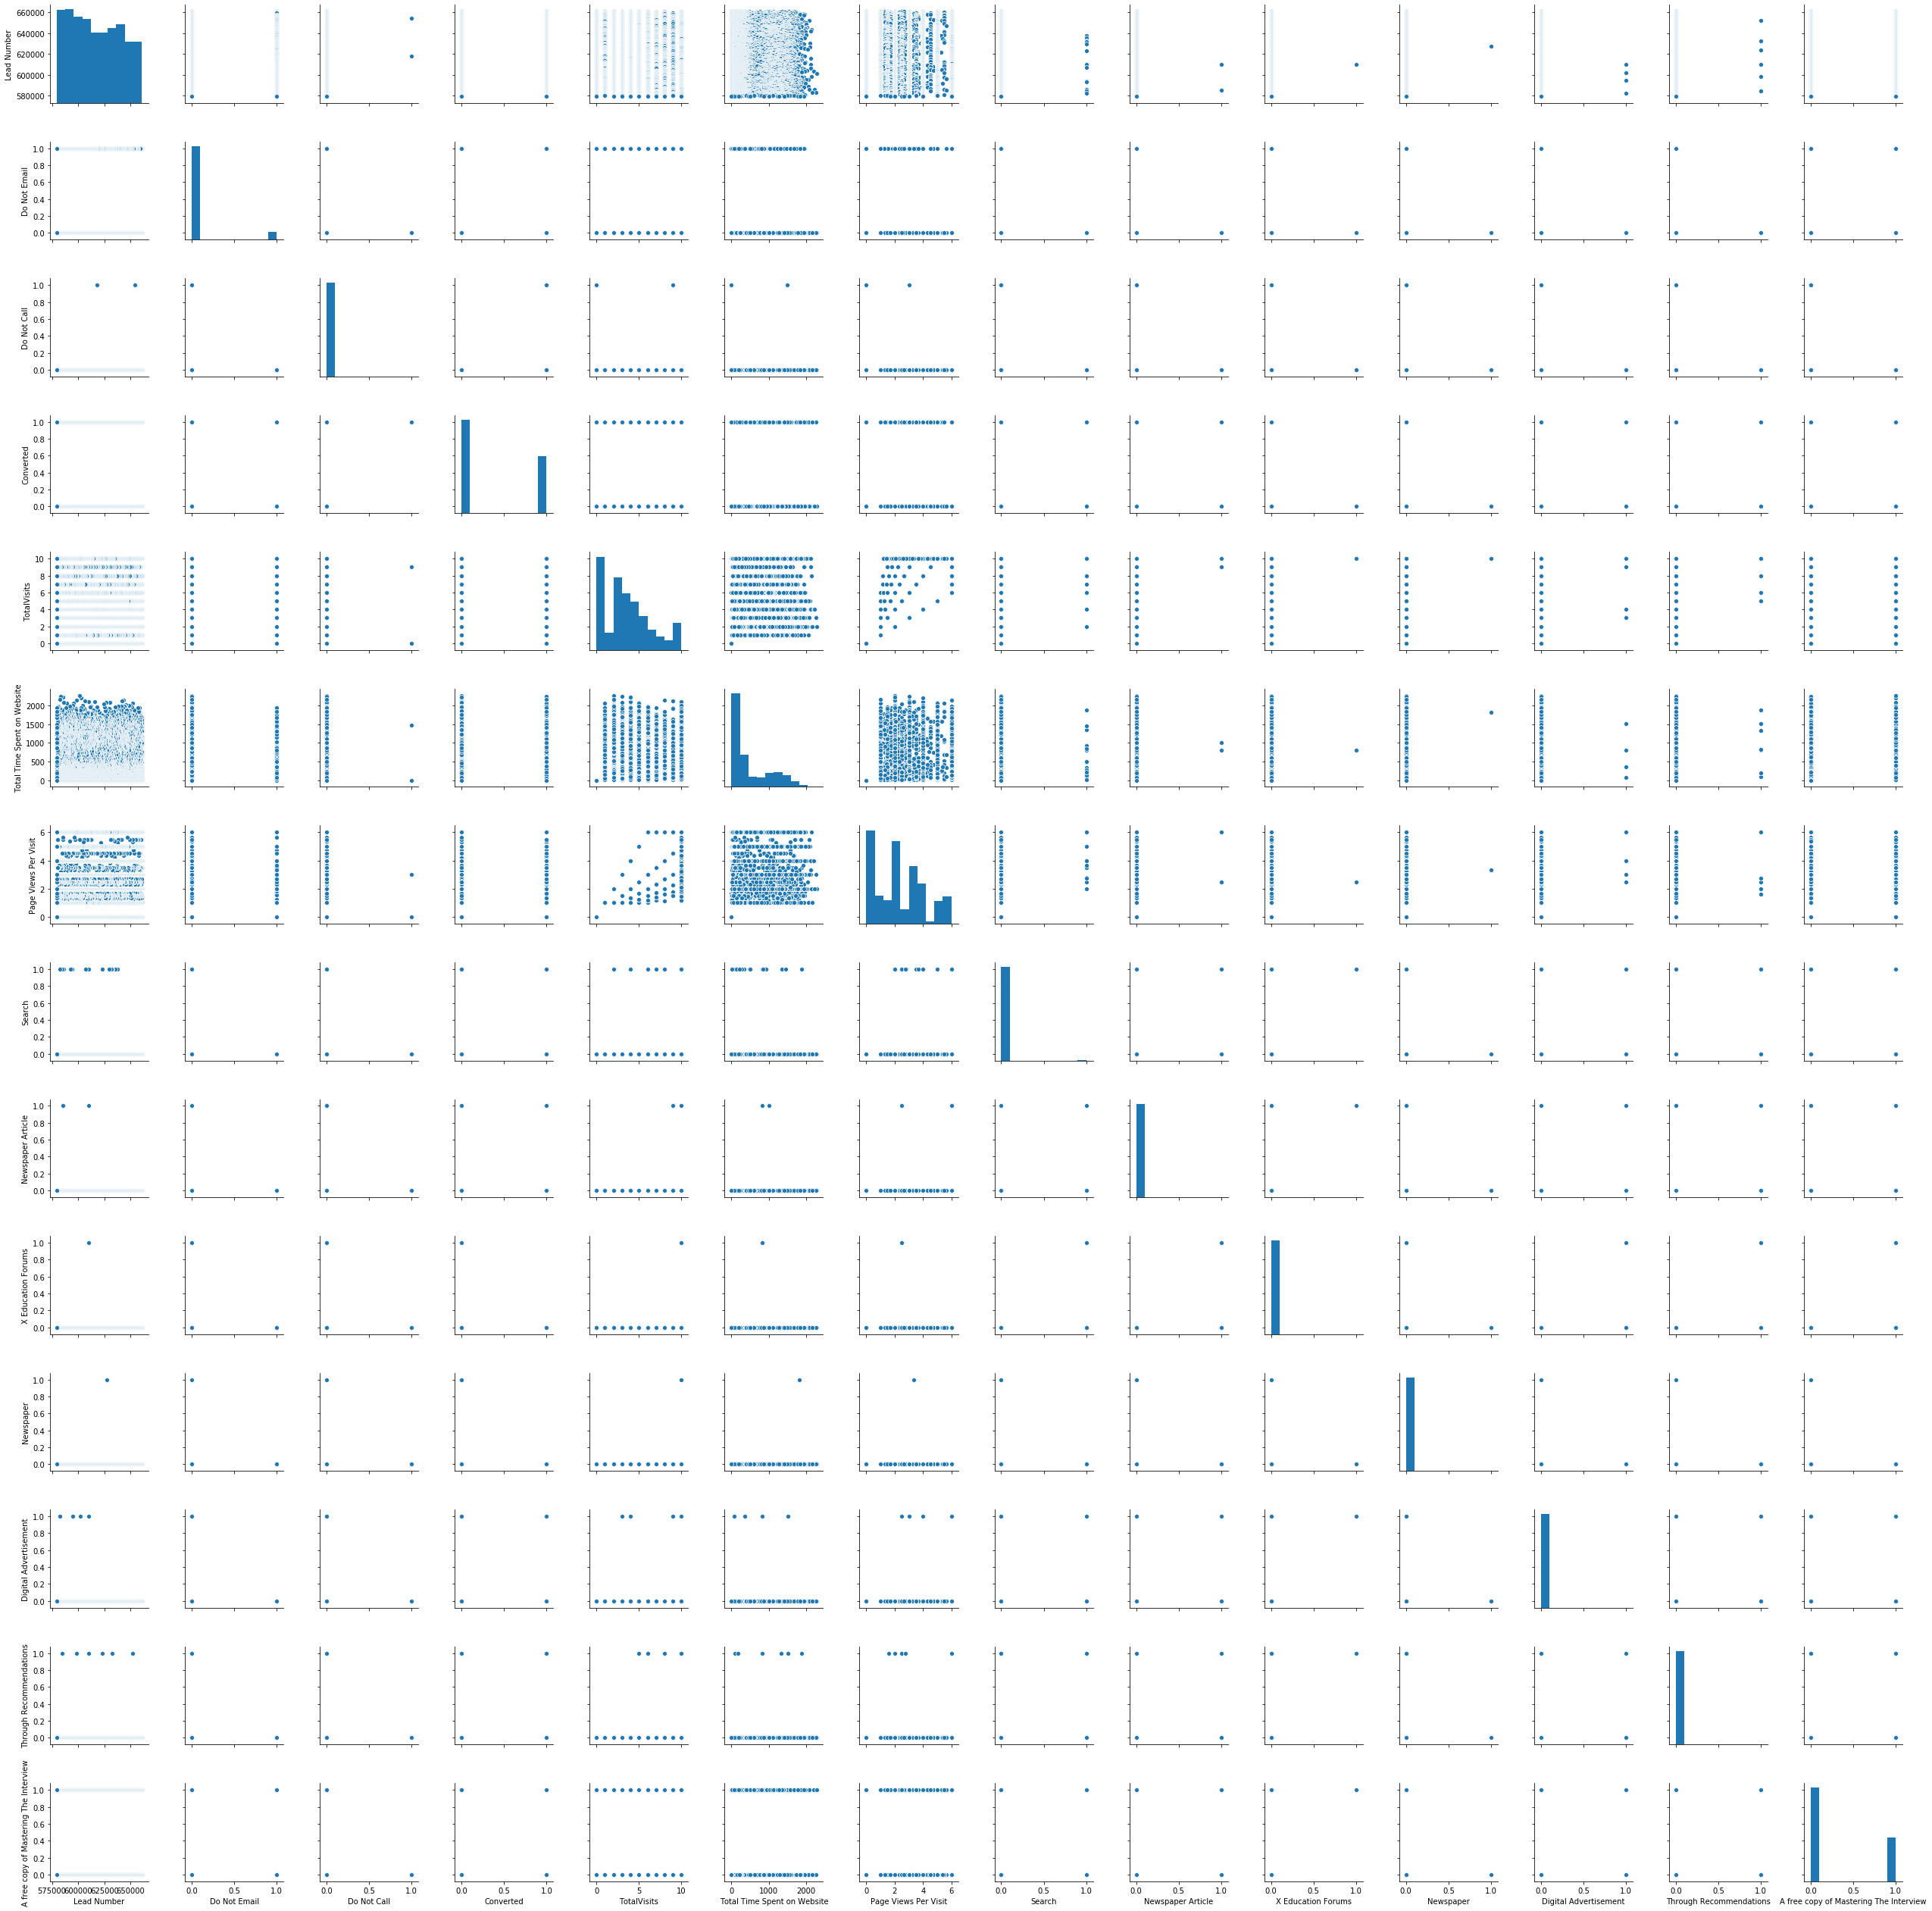

In [83]:
sns.pairplot(data)
plt.show()

In [84]:
#not much can be inferred from the above graphs
from matplotlib.pyplot import xticks
%matplotlib inline


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

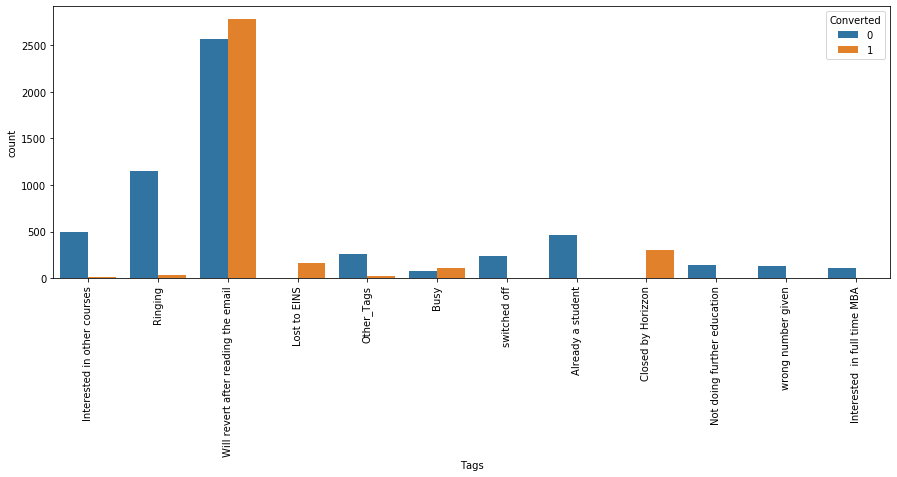

In [85]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

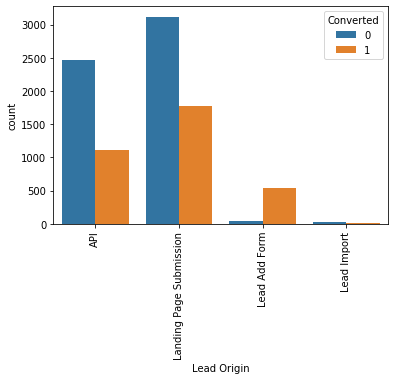

In [86]:
# will revert after reading email has high conversion ratio
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)

In [87]:
#lead add forum has high conversion 
#lead import are very less in number

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

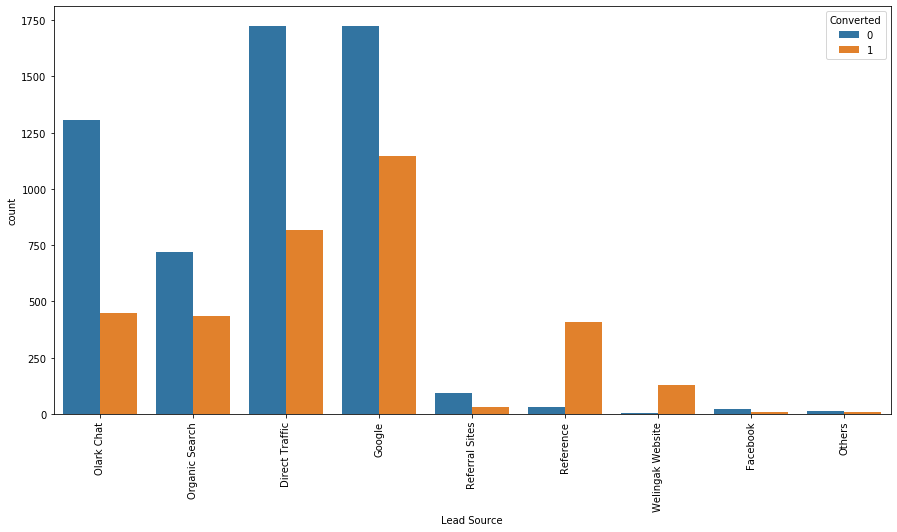

In [88]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

In [89]:
#refernce has the highest conversion rate.
#google and welignak website has fairly goof conversion too. 
# Direct Traffic conversion is good, but not as high as google

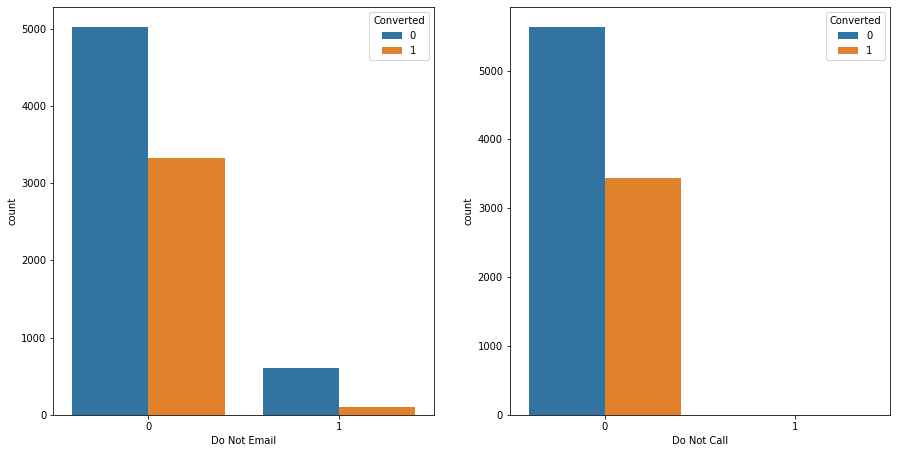

In [90]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

In [91]:
# conversion rate is good for people who  opt for email and call.
data["Do Not Call"].value_counts()

0    9072
1       2
Name: Do Not Call, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

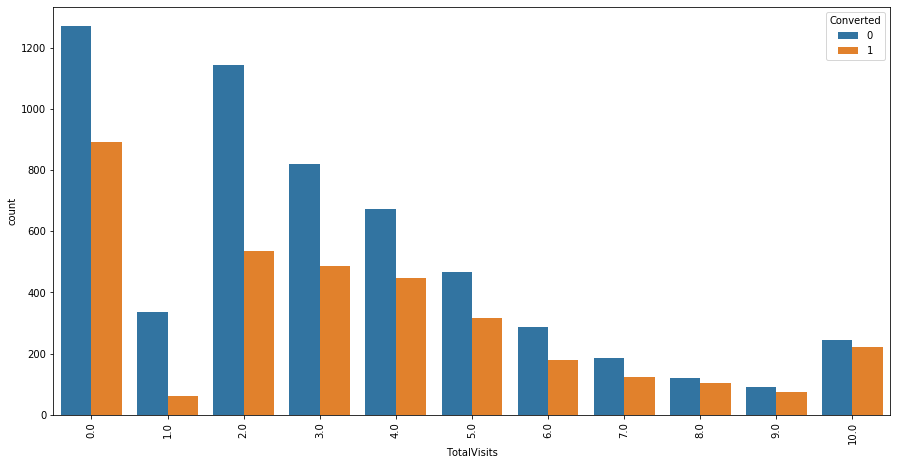

In [92]:
data.drop(["Do Not Call"],axis =1 , inplace = True)
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "TotalVisits", hue = "Converted", data = data)
xticks(rotation = 90)

In [93]:
# as the total visits increase, the conversion percentage increase

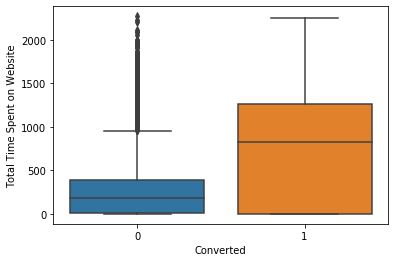

In [94]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

In [95]:
#leads spending more time on website have higher chance of conversion

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 <a list of 91 Text xticklabel objects>)

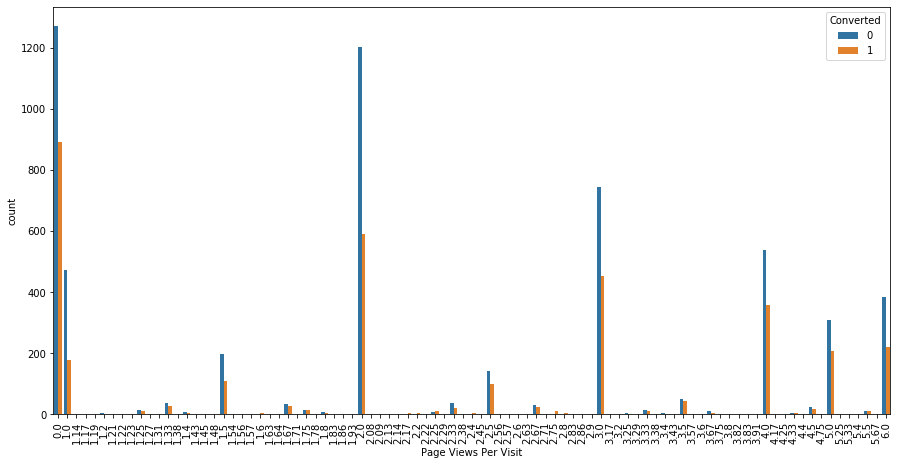

In [96]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Page Views Per Visit", hue = "Converted", data = data)
xticks(rotation = 90)

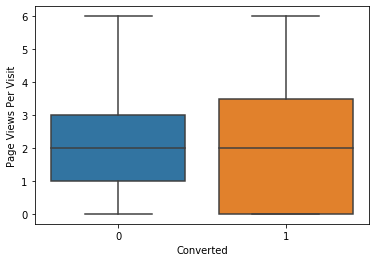

In [97]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

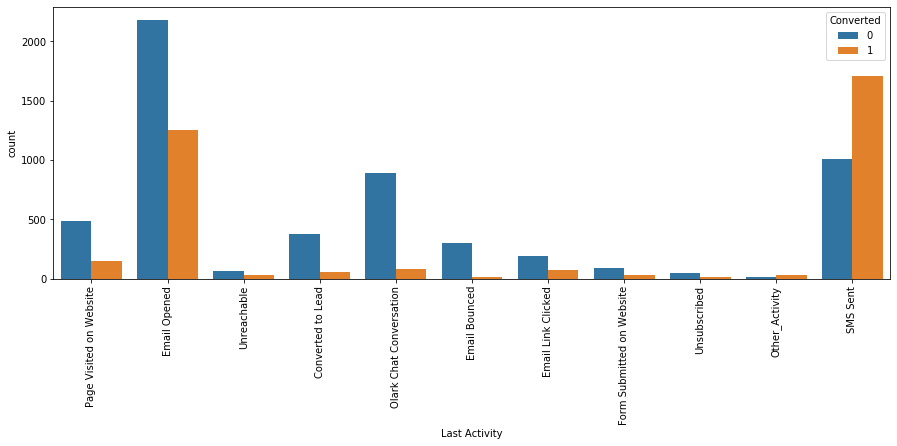

In [98]:
# nothing can be said as the median is the same.
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

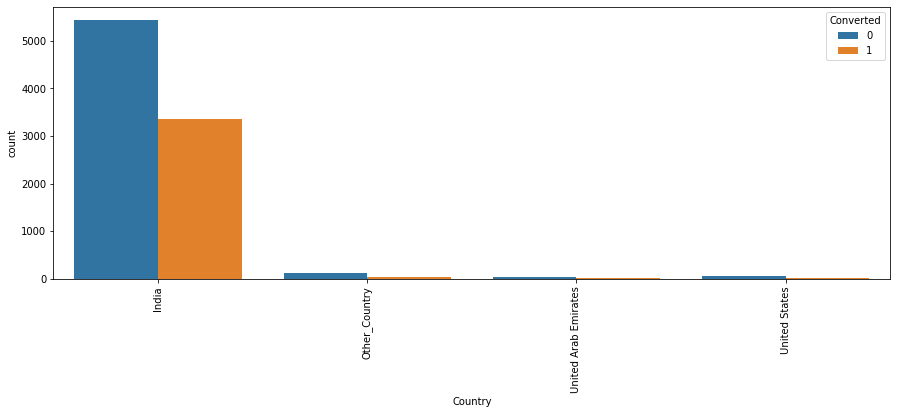

In [99]:
# sms sent has good conversion rate. 
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Country", hue = "Converted", data = data)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

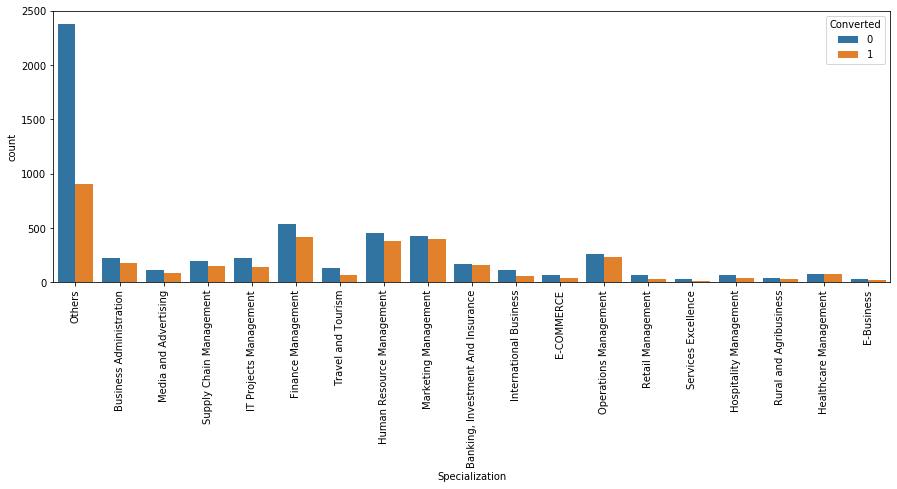

In [100]:
# India is the major country
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = data)
xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

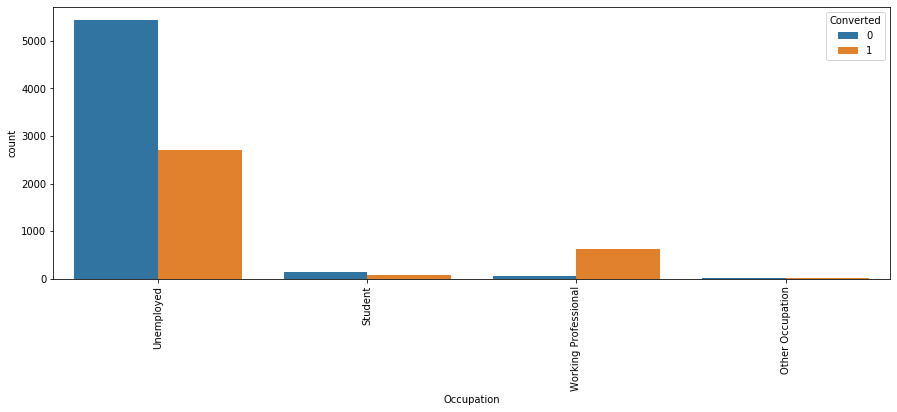

In [101]:
# we should foucs more on finance management, Hr managment and marketting management
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Occupation", hue = "Converted", data = data)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

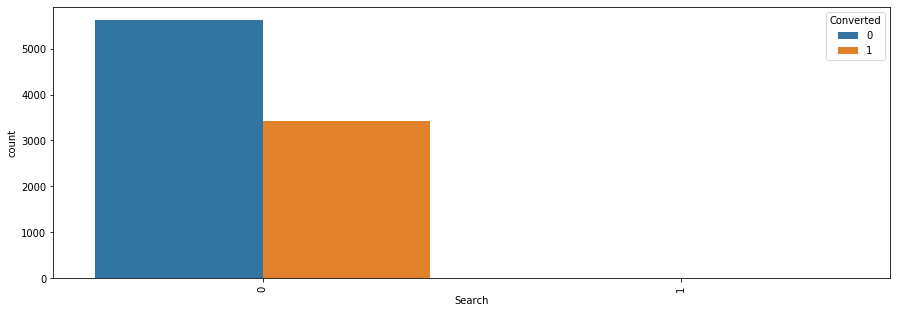

In [102]:
# foucs on working proffesional and students
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Search", hue = "Converted", data = data)
xticks(rotation = 90)

In [103]:
data['Search'].value_counts()

0    9060
1      14
Name: Search, dtype: int64

In [104]:
# only 14 values are yes . so we drop 'Search column'
data.drop(['Search'],axis= 1, inplace = True)

In [105]:
data['Newspaper Article'].value_counts()

0    9072
1       2
Name: Newspaper Article, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

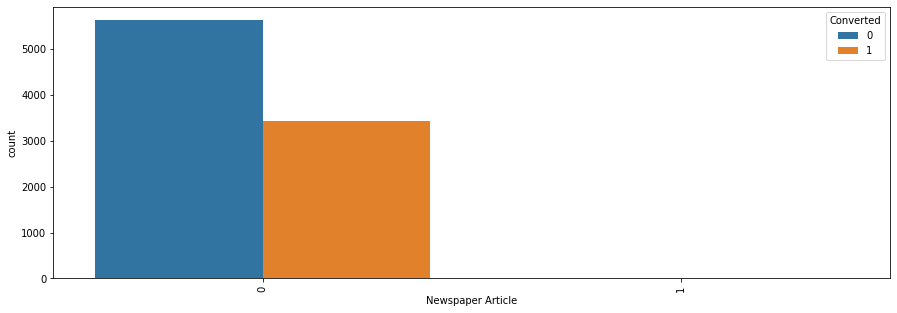

In [106]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = data)
xticks(rotation = 90)

In [107]:
data['Newspaper Article'].value_counts()

0    9072
1       2
Name: Newspaper Article, dtype: int64

In [108]:
#hence we drop Newspaper Article
data.drop(['Newspaper Article'],axis =1, inplace = True)

In [109]:
data['X Education Forums'].value_counts()

0    9073
1       1
Name: X Education Forums, dtype: int64

In [110]:
data.drop(['X Education Forums'],axis = 1, inplace = True)

In [111]:
data['Newspaper'].describe()

count    9074.000000
mean        0.000110
std         0.010498
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Newspaper, dtype: float64

In [112]:
data.drop(['Newspaper'],axis = 1, inplace = True)

In [113]:
data['Digital Advertisement'].value_counts()

0    9070
1       4
Name: Digital Advertisement, dtype: int64

In [114]:
data.drop(['Digital Advertisement'],axis = 1, inplace = True)

In [115]:
data['Through Recommendations'].value_counts()

0    9067
1       7
Name: Through Recommendations, dtype: int64

In [116]:
data.drop(['Through Recommendations'],axis = 1, inplace = True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

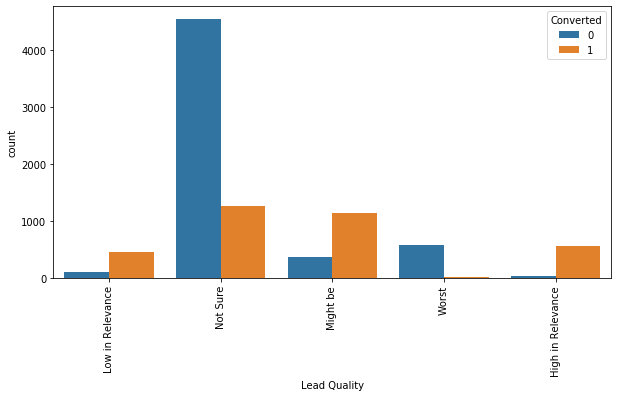

In [117]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)


In [118]:
#high relevance and might be have good conversion 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

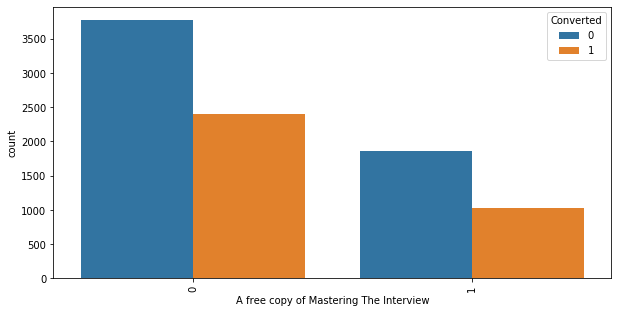

In [119]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = data)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

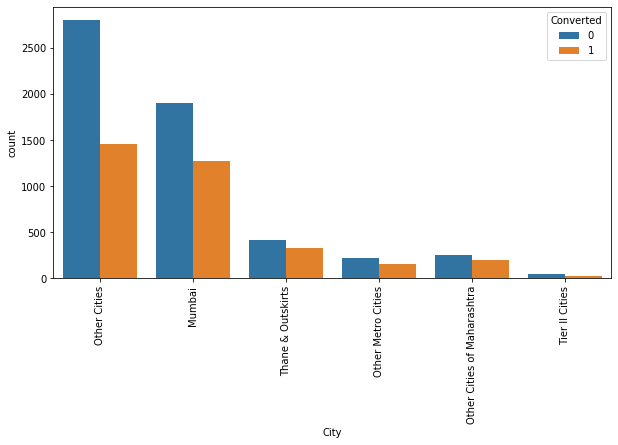

In [120]:
# nothing much can be interpretted.
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = data)
xticks(rotation = 90)

In [121]:
data.drop(['Lead Number'], axis = 1, inplace = True)

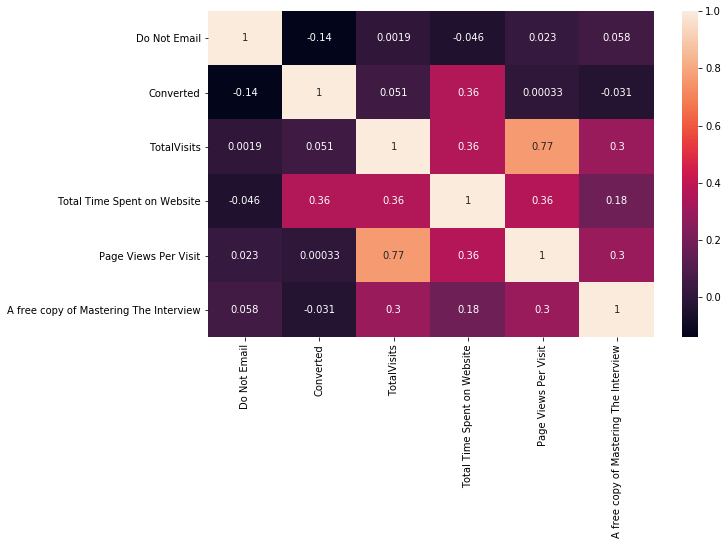

In [122]:
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),annot = True)

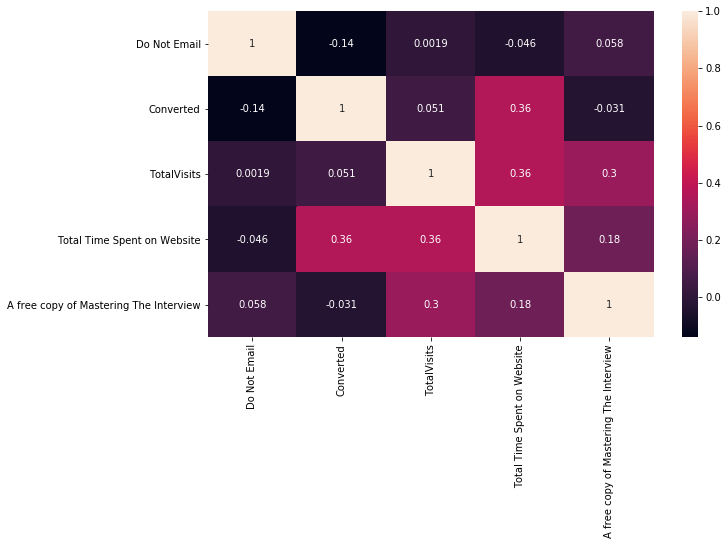

In [123]:
#total visits and pages views per visit have a high correlation.
data.drop(['Page Views Per Visit'],axis =1, inplace = True)
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),annot = True)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   int64  
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Last Activity                           9074 non-null   object 
 8   Country                                 9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  Occupation                              9074 non-null   obje

In [125]:
#converting categorical variables to dummy variables
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity','Country', 'Specialization','Occupation',
                              'Tags','Lead Quality','City']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Other_Country,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [126]:
data = pd.concat([data, dummy1], axis=1)
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity','Country', 'Specialization','Occupation',
                  'Tags','Lead Quality','City'], axis = 1)
data.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Other_Country,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [127]:
data.shape

(9074, 71)

In [128]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)
Y = data['Converted']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Other_Country,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
160,0,-0.071614,0.961655,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2267,0,-1.147903,-0.886605,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
8895,0,-1.147903,-0.886605,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
854,0,0.287149,2.136489,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3640,0,0.287149,-0.505974,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [130]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

In [131]:
import statsmodels.api as sm

In [132]:
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7189
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1574.1
Date:                Mon, 08 Jun 2020   Deviance:                       3148.1
Time:                        23:18:04   Pearson chi2:                 7.85e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3062      1.357     -0.226      0.821      -2.966       2.353
Do Not Email                                -1.3079      0.272     -4.803      0.000      -1.842      -0.774
TotalVisits                                  0.1140      0.065      1.741      0.082      -0.014       0.242
Total Time Spent on Website                  1.0853      0.056     19.476      0.000       0.976       1.195
A free copy of Mastering The Interview      -0.1727      0.155     -1.113      0.266      -0.477       0.132
Lead Origin_Landing Page Submission         -1.0049      0.201     -4.989      0.000      -1.400      -0.610
Lead Origin_Lead Add Form                   -0.1777      1.206     -0.147      0.883      -2.542       2.187
Lead Origin_Lead Import                     29.1952   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                       -28.2822   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                           0.0433      0.162      0.268      0.789      -0.273       0.360
Lead Source_Olark Chat                       1.0642      0.213      5.004      0.000       0.647       1.481
Lead Source_Organic Search                   0.0786      0.182      0.433      0.665      -0.278       0.435
Lead Source_Others                           0.8793      0.764      1.152      0.249      -0.617       2.376
Lead Source_Reference                        1.8255      1.259      1.451      0.147      -0.641       4.292
Lead Source_Referral Sites                  -0.1412      0.431     -0.327      0.743      -0.986       0.704
Lead Source_Welingak Website                 5.5273      1.416      3.904      0.000       2.752       8.302
Last Activity_Email Bounced                  0.3353      0.571      0.587      0.557      -0.783       1.454
Last Activity_Email Link Clicked             0.2932      0.414      0.708      0.479      -0.518       1.104
Last Activity_Email Opened                   0.9848      0.303      3.247      0.001       0.390       1.579
Last Activity_Form Submitted on Website      0.1869      0.551      0.339      0.734      -0.892       1.266
Last Activity_Olark Chat Conversation       -0.7555      0.353     -2.140      0.032      -1.447      -0.064
Last Activity_Other_Activity                 1.9005      0.808      2.353      0.019       0.318       3.483
Last Activity_Page Visited on Website        0.4466      0.360      1.239      0.215      -0.260       1.153
Last Activity_SMS Sent                       2.7407      0.306      8.970      0.000       2.142       3.339
Last Activity_Unreachable                    1.3236      0.527      2.510      0.012       0.290       2.357
Last Activity_Unsubscribed     

In [133]:
#lot of variables have p values greater than 0.05
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)    # running RFE with 20 variables 
rfe = rfe.fit(X_train, Y_train)

In [134]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Occupation_Student', 'Occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst'],
      dtype='object')

In [135]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7238
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1645.6
Date:                Mon, 08 Jun 2020   Deviance:                       3291.1
Time:                        23:18:19   Pearson chi2:                 3.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9070      0.322     -2.816      0.005      -1.538      -0.276
Do Not Email                                -1.5489      0.220     -7.051      0.000      -1.979      -1.118
Total Time Spent on Website                  1.0872      0.053     20.345      0.000       0.982       1.192
Lead Origin_Lead Add Form                    2.3375      0.339      6.897      0.000       1.673       3.002
Lead Source_Olark Chat                       1.3803      0.129     10.740      0.000       1.128       1.632
Lead Source_Welingak Website                 3.3249      0.800      4.158      0.000       1.758       4.892
Last Activity_Olark Chat Conversation       -1.5659      0.195     -8.027      0.000      -1.948      -1.184
Last Activity_SMS Sent                       1.7970      0.100     17.979      0.000       1.601       1.993
Last Activity_Unsubscribed                   1.3826      0.631      2.193      0.028       0.147       2.618
Occupation_Student                          -1.1216      0.470     -2.389      0.017      -2.042      -0.201
Occupation_Unemployed                       -1.3295      0.276     -4.815      0.000      -1.871      -0.788
Tags_Busy                                    3.6108      0.313     11.525      0.000       2.997       4.225
Tags_Closed by Horizzon                      7.7642      0.774     10.032      0.000       6.247       9.281
Tags_Lost to EINS                            8.3558      0.651     12.831      0.000       7.079       9.632
Tags_Not doing further education            -1.0491      1.125     -0.933      0.351      -3.254       1.156
Tags_Ringing                                -1.2716      0.317     -4.015      0.000      -1.892      -0.651
Tags_Will revert after reading the email     3.6671      0.224     16.384      0.000       3.228       4.106
Tags_switched off                           -1.8852      0.606     -3.111      0.002      -3.073      -0.698
Tags_wrong number given                    -22.6491    1.7e+04     -0.001      0.999   -3.33e+04    3.33e+04
Lead Quality_Not Sure                       -3.1136      0.127    -24.422      0.000      -3.363      -2.864
Lead Quality_Worst                          -3.8664      0.768     -5.033      0.000      -5.372      -2.361
============================================================================================================
"""

In [136]:
col1 = col.drop('Tags_wrong number given',1)

In [137]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7239
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1650.9
Date:                Mon, 08 Jun 2020   Deviance:                       3301.8
Time:                        23:18:19   Pearson chi2:                 3.13e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0368      0.324     -3.203      0.001      -1.671      -0.402
Do Not Email                                -1.5456      0.219     -7.054      0.000      -1.975      -1.116
Total Time Spent on Website                  1.0849      0.053     20.385      0.000       0.981       1.189
Lead Origin_Lead Add Form                    2.3600      0.340      6.935      0.000       1.693       3.027
Lead Source_Olark Chat                       1.3816      0.128     10.763      0.000       1.130       1.633
Lead Source_Welingak Website                 3.3005      0.800      4.125      0.000       1.732       4.869
Last Activity_Olark Chat Conversation       -1.5660      0.195     -8.027      0.000      -1.948      -1.184
Last Activity_SMS Sent                       1.7815      0.100     17.892      0.000       1.586       1.977
Last Activity_Unsubscribed                   1.3827      0.631      2.192      0.028       0.146       2.619
Occupation_Student                          -1.1070      0.474     -2.335      0.020      -2.036      -0.178
Occupation_Unemployed                       -1.3611      0.278     -4.895      0.000      -1.906      -0.816
Tags_Busy                                    3.7742      0.311     12.117      0.000       3.164       4.385
Tags_Closed by Horizzon                      7.9146      0.774     10.231      0.000       6.398       9.431
Tags_Lost to EINS                            8.5200      0.652     13.063      0.000       7.242       9.798
Tags_Not doing further education            -0.8944      1.130     -0.792      0.428      -3.108       1.319
Tags_Ringing                                -1.1009      0.314     -3.504      0.000      -1.717      -0.485
Tags_Will revert after reading the email     3.8234      0.222     17.199      0.000       3.388       4.259
Tags_switched off                           -1.7106      0.604     -2.831      0.005      -2.895      -0.526
Lead Quality_Not Sure                       -3.1040      0.127    -24.414      0.000      -3.353      -2.855
Lead Quality_Worst                          -3.9529      0.771     -5.129      0.000      -5.463      -2.442
============================================================================================================
"""

In [138]:
col2 = col1.drop('Tags_Not doing further education',1)
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1651.3
Date:                Mon, 08 Jun 2020   Deviance:                       3302.5
Time:                        23:18:19   Pearson chi2:                 3.05e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0818      0.320     -3.381      0.001      -1.709      -0.455
Do Not Email                                -1.5461      0.219     -7.061      0.000      -1.975      -1.117
Total Time Spent on Website                  1.0857      0.053     20.397      0.000       0.981       1.190
Lead Origin_Lead Add Form                    2.3438      0.338      6.930      0.000       1.681       3.007
Lead Source_Olark Chat                       1.3833      0.128     10.774      0.000       1.132       1.635
Lead Source_Welingak Website                 3.3177      0.799      4.151      0.000       1.751       4.884
Last Activity_Olark Chat Conversation       -1.5656      0.195     -8.023      0.000      -1.948      -1.183
Last Activity_SMS Sent                       1.7834      0.100     17.914      0.000       1.588       1.978
Last Activity_Unsubscribed                   1.3863      0.631      2.197      0.028       0.149       2.623
Occupation_Student                          -1.0890      0.474     -2.299      0.022      -2.018      -0.161
Occupation_Unemployed                       -1.3518      0.277     -4.877      0.000      -1.895      -0.808
Tags_Busy                                    3.8090      0.310     12.302      0.000       3.202       4.416
Tags_Closed by Horizzon                      7.9530      0.773     10.294      0.000       6.439       9.467
Tags_Lost to EINS                            8.5604      0.651     13.143      0.000       7.284       9.837
Tags_Ringing                                -1.0663      0.312     -3.414      0.001      -1.678      -0.454
Tags_Will revert after reading the email     3.8591      0.220     17.581      0.000       3.429       4.289
Tags_switched off                           -1.6770      0.603     -2.779      0.005      -2.860      -0.494
Lead Quality_Not Sure                       -3.1049      0.127    -24.417      0.000      -3.354      -2.856
Lead Quality_Worst                          -3.9821      0.766     -5.199      0.000      -5.483      -2.481
============================================================================================================
"""

In [139]:
col3 = col2.drop('Last Activity_Unsubscribed',1)
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1653.6
Date:                Mon, 08 Jun 2020   Deviance:                       3307.1
Time:                        23:18:20   Pearson chi2:                 2.98e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0672      0.321     -3.330      0.001      -1.695      -0.439
Do Not Email                                -1.4110      0.205     -6.886      0.000      -1.813      -1.009
Total Time Spent on Website                  1.0882      0.053     20.461      0.000       0.984       1.192
Lead Origin_Lead Add Form                    2.3311      0.338      6.898      0.000       1.669       2.993
Lead Source_Olark Chat                       1.3862      0.128     10.801      0.000       1.135       1.638
Lead Source_Welingak Website                 3.3031      0.798      4.138      0.000       1.739       4.868
Last Activity_Olark Chat Conversation       -1.5734      0.195     -8.063      0.000      -1.956      -1.191
Last Activity_SMS Sent                       1.7694      0.099     17.839      0.000       1.575       1.964
Occupation_Student                          -1.1172      0.473     -2.362      0.018      -2.044      -0.190
Occupation_Unemployed                       -1.3592      0.278     -4.885      0.000      -1.904      -0.814
Tags_Busy                                    3.8128      0.310     12.311      0.000       3.206       4.420
Tags_Closed by Horizzon                      7.9535      0.773     10.292      0.000       6.439       9.468
Tags_Lost to EINS                            8.5587      0.652     13.134      0.000       7.282       9.836
Tags_Ringing                                -1.0621      0.312     -3.400      0.001      -1.674      -0.450
Tags_Will revert after reading the email     3.8641      0.220     17.593      0.000       3.434       4.295
Tags_switched off                           -1.6837      0.604     -2.790      0.005      -2.867      -0.501
Lead Quality_Not Sure                       -3.1129      0.127    -24.477      0.000      -3.362      -2.864
Lead Quality_Worst                          -3.9902      0.764     -5.219      0.000      -5.489      -2.492
============================================================================================================
"""

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Occupation_Unemployed,8.08
16,Lead Quality_Not Sure,4.40
14,Tags_Will revert after reading the email,4.26
3,Lead Source_Olark Chat,1.85
13,Tags_Ringing,1.84
2,Lead Origin_Lead Add Form,1.76
6,Last Activity_SMS Sent,1.68
17,Lead Quality_Worst,1.62
5,Last Activity_Olark Chat Conversation,1.44
1,Total Time Spent on Website,1.41


In [142]:
col3 = col2.drop('Occupation_Unemployed',1)
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1665.2
Date:                Mon, 08 Jun 2020   Deviance:                       3330.3
Time:                        23:18:21   Pearson chi2:                 3.63e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2622      0.210    -10.793      0.000      -2.673      -1.851
Do Not Email                                -1.5329      0.218     -7.017      0.000      -1.961      -1.105
Total Time Spent on Website                  1.0882      0.053     20.515      0.000       0.984       1.192
Lead Origin_Lead Add Form                    2.4366      0.339      7.193      0.000       1.773       3.100
Lead Source_Olark Chat                       1.3835      0.128     10.799      0.000       1.132       1.635
Lead Source_Welingak Website                 3.2050      0.799      4.009      0.000       1.638       4.772
Last Activity_Olark Chat Conversation       -1.5934      0.195     -8.182      0.000      -1.975      -1.212
Last Activity_SMS Sent                       1.7818      0.099     17.972      0.000       1.587       1.976
Last Activity_Unsubscribed                   1.4232      0.639      2.228      0.026       0.171       2.675
Occupation_Student                           0.1131      0.406      0.278      0.781      -0.683       0.909
Tags_Busy                                    3.8198      0.309     12.345      0.000       3.213       4.426
Tags_Closed by Horizzon                      8.0198      0.773     10.376      0.000       6.505       9.535
Tags_Lost to EINS                            8.5850      0.651     13.195      0.000       7.310       9.860
Tags_Ringing                                -1.1599      0.310     -3.739      0.000      -1.768      -0.552
Tags_Will revert after reading the email     3.9018      0.218     17.912      0.000       3.475       4.329
Tags_switched off                           -1.8151      0.605     -3.000      0.003      -3.001      -0.629
Lead Quality_Not Sure                       -3.3000      0.124    -26.637      0.000      -3.543      -3.057
Lead Quality_Worst                          -4.0875      0.773     -5.286      0.000      -5.603      -2.572
============================================================================================================
"""

In [143]:
col4 = col3.drop('Occupation_Student',1)
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1665.2
Date:                Mon, 08 Jun 2020   Deviance:                       3330.4
Time:                        23:18:21   Pearson chi2:                 3.64e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2556      0.208    -10.839      0.000      -2.663      -1.848
Do Not Email                                -1.5309      0.218     -7.011      0.000      -1.959      -1.103
Total Time Spent on Website                  1.0886      0.053     20.525      0.000       0.985       1.193
Lead Origin_Lead Add Form                    2.4373      0.339      7.200      0.000       1.774       3.101
Lead Source_Olark Chat                       1.3833      0.128     10.799      0.000       1.132       1.634
Lead Source_Welingak Website                 3.2036      0.799      4.008      0.000       1.637       4.770
Last Activity_Olark Chat Conversation       -1.5942      0.195     -8.188      0.000      -1.976      -1.213
Last Activity_SMS Sent                       1.7812      0.099     17.970      0.000       1.587       1.975
Last Activity_Unsubscribed                   1.4192      0.639      2.222      0.026       0.167       2.671
Tags_Busy                                    3.8172      0.309     12.347      0.000       3.211       4.423
Tags_Closed by Horizzon                      8.0166      0.773     10.373      0.000       6.502       9.531
Tags_Lost to EINS                            8.5858      0.651     13.194      0.000       7.310       9.861
Tags_Ringing                                -1.1653      0.309     -3.765      0.000      -1.772      -0.559
Tags_Will revert after reading the email     3.8998      0.218     17.925      0.000       3.473       4.326
Tags_switched off                           -1.8212      0.605     -3.012      0.003      -3.006      -0.636
Lead Quality_Not Sure                       -3.3040      0.123    -26.829      0.000      -3.545      -3.063
Lead Quality_Worst                          -4.0760      0.770     -5.294      0.000      -5.585      -2.567
============================================================================================================
"""

In [144]:
col5 = col4.drop('Last Activity_Unsubscribed',1)
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1667.5
Date:                Mon, 08 Jun 2020   Deviance:                       3335.1
Time:                        23:18:21   Pearson chi2:                 3.56e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2482      0.208    -10.802      0.000      -2.656      -1.840
Do Not Email                                -1.3973      0.205     -6.826      0.000      -1.798      -0.996
Total Time Spent on Website                  1.0911      0.053     20.593      0.000       0.987       1.195
Lead Origin_Lead Add Form                    2.4255      0.338      7.170      0.000       1.762       3.089
Lead Source_Olark Chat                       1.3854      0.128     10.819      0.000       1.134       1.636
Lead Source_Welingak Website                 3.1887      0.798      3.994      0.000       1.624       4.753
Last Activity_Olark Chat Conversation       -1.6015      0.195     -8.224      0.000      -1.983      -1.220
Last Activity_SMS Sent                       1.7672      0.099     17.895      0.000       1.574       1.961
Tags_Busy                                    3.8202      0.309     12.355      0.000       3.214       4.426
Tags_Closed by Horizzon                      8.0169      0.773     10.372      0.000       6.502       9.532
Tags_Lost to EINS                            8.5829      0.651     13.184      0.000       7.307       9.859
Tags_Ringing                                -1.1613      0.310     -3.751      0.000      -1.768      -0.555
Tags_Will revert after reading the email     3.9039      0.218     17.934      0.000       3.477       4.331
Tags_switched off                           -1.8282      0.605     -3.023      0.003      -3.014      -0.643
Lead Quality_Not Sure                       -3.3111      0.123    -26.882      0.000      -3.553      -3.070
Lead Quality_Worst                          -4.0864      0.769     -5.315      0.000      -5.593      -2.580
============================================================================================================
"""

In [145]:
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.93
13,Lead Quality_Not Sure,2.90
3,Lead Source_Olark Chat,1.84
2,Lead Origin_Lead Add Form,1.76
6,Last Activity_SMS Sent,1.66
10,Tags_Ringing,1.52
5,Last Activity_Olark Chat Conversation,1.44
1,Total Time Spent on Website,1.41
4,Lead Source_Welingak Website,1.33
8,Tags_Closed by Horizzon,1.17


In [146]:
col6 = col5.drop('Lead Quality_Not Sure',1)
X_train_sm = sm.add_constant(X_train[col6])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2217.1
Date:                Mon, 08 Jun 2020   Deviance:                       4434.1
Time:                        23:18:22   Pearson chi2:                 1.38e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.8610      0.193    -20.034      0.000      -4.239      -3.483
Do Not Email                                -1.6315      0.171     -9.533      0.000      -1.967      -1.296
Total Time Spent on Website                  1.1668      0.046     25.183      0.000       1.076       1.258
Lead Origin_Lead Add Form                    3.8640      0.269     14.353      0.000       3.336       4.392
Lead Source_Olark Chat                       0.9233      0.109      8.480      0.000       0.710       1.137
Lead Source_Welingak Website                 0.9452      0.770      1.228      0.220      -0.564       2.454
Last Activity_Olark Chat Conversation       -1.7530      0.171    -10.258      0.000      -2.088      -1.418
Last Activity_SMS Sent                       1.7504      0.085     20.539      0.000       1.583       1.917
Tags_Busy                                    2.5631      0.282      9.091      0.000       2.011       3.116
Tags_Closed by Horizzon                      7.9078      0.746     10.597      0.000       6.445       9.370
Tags_Lost to EINS                            7.5013      0.662     11.331      0.000       6.204       8.799
Tags_Ringing                                -1.4540      0.287     -5.059      0.000      -2.017      -0.891
Tags_Will revert after reading the email     3.2214      0.191     16.844      0.000       2.847       3.596
Tags_switched off                           -1.3601      0.566     -2.402      0.016      -2.470      -0.250
Lead Quality_Worst                          -2.1476      0.667     -3.218      0.001      -3.456      -0.840
============================================================================================================
"""

In [147]:
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,1.89
3,Lead Source_Olark Chat,1.83
2,Lead Origin_Lead Add Form,1.69
6,Last Activity_SMS Sent,1.65
5,Last Activity_Olark Chat Conversation,1.41
1,Total Time Spent on Website,1.37
4,Lead Source_Welingak Website,1.30
8,Tags_Closed by Horizzon,1.15
10,Tags_Ringing,1.11
0,Do Not Email,1.09


In [148]:
x = X_train[col6]
rfe = RFE(logreg, 5)    # running RFE with 5 variables as output
rfe = rfe.fit(x, Y_train)

In [149]:
col = x.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Will revert after reading the email'],
      dtype='object')

In [150]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[col6])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2217.1
Date:                Mon, 08 Jun 2020   Deviance:                       4434.1
Time:                        23:18:24   Pearson chi2:                 1.38e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.8610      0.193    -20.034      0.000      -4.239      -3.483
Do Not Email                                -1.6315      0.171     -9.533      0.000      -1.967      -1.296
Total Time Spent on Website                  1.1668      0.046     25.183      0.000       1.076       1.258
Lead Origin_Lead Add Form                    3.8640      0.269     14.353      0.000       3.336       4.392
Lead Source_Olark Chat                       0.9233      0.109      8.480      0.000       0.710       1.137
Lead Source_Welingak Website                 0.9452      0.770      1.228      0.220      -0.564       2.454
Last Activity_Olark Chat Conversation       -1.7530      0.171    -10.258      0.000      -2.088      -1.418
Last Activity_SMS Sent                       1.7504      0.085     20.539      0.000       1.583       1.917
Tags_Busy                                    2.5631      0.282      9.091      0.000       2.011       3.116
Tags_Closed by Horizzon                      7.9078      0.746     10.597      0.000       6.445       9.370
Tags_Lost to EINS                            7.5013      0.662     11.331      0.000       6.204       8.799
Tags_Ringing                                -1.4540      0.287     -5.059      0.000      -2.017      -0.891
Tags_Will revert after reading the email     3.2214      0.191     16.844      0.000       2.847       3.596
Tags_switched off                           -1.3601      0.566     -2.402      0.016      -2.470      -0.250
Lead Quality_Worst                          -2.1476      0.667     -3.218      0.001      -3.456      -0.840
============================================================================================================
"""

In [151]:
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

160     0.618330
2267    0.075597
8895    0.731008
854     0.864505
3640    0.226197
dtype: float64

In [152]:
y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = Y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
160,1,0.618330,160
2267,0,0.075597,2267
8895,1,0.731008,8895
854,1,0.864505,854
3640,0,0.226197,3640


In [153]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
160,1,0.618330,160,1
2267,0,0.075597,2267,0
8895,1,0.731008,8895,1
854,1,0.864505,854,1
3640,0,0.226197,3640,0


In [154]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4070  425]
 [ 476 2288]]


In [155]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8758782201405152


In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8277858176555717

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.9054505005561735

In [159]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09454949944382647


In [160]:
# positive predictive value 
print (TP / float(TP+FP))

0.8433468485071877


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.895292564892213


In [162]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

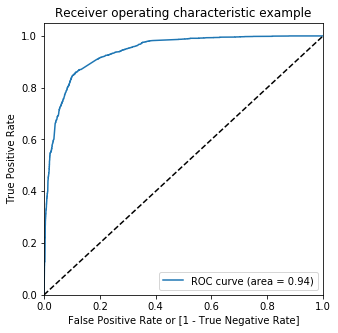

In [164]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [165]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
160,1,0.618330,160,1,1,1,1,1,1,1,1,0,0,0
2267,0,0.075597,2267,0,1,0,0,0,0,0,0,0,0,0
8895,1,0.731008,8895,1,1,1,1,1,1,1,1,1,0,0
854,1,0.864505,854,1,1,1,1,1,1,1,1,1,1,0
3640,0,0.226197,3640,0,1,1,1,0,0,0,0,0,0,0


In [166]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380769  1.000000  0.000000
0.1   0.1  0.764293  0.977931  0.632925
0.2   0.2  0.802177  0.946816  0.713237
0.3   0.3  0.845847  0.912446  0.804894
0.4   0.4  0.876567  0.853111  0.890990
0.5   0.5  0.875878  0.827786  0.905451
0.6   0.6  0.864995  0.761216  0.928810
0.7   0.7  0.851632  0.688495  0.951947
0.8   0.8  0.814162  0.550289  0.976418
0.9   0.9  0.768012  0.412446  0.986652


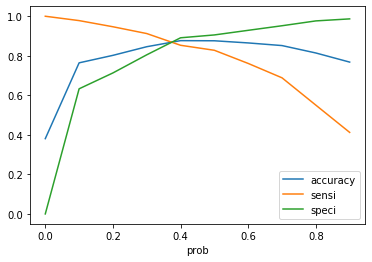

In [167]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [168]:
# value of 0.35 is optimum.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
160,1,0.618330,160,1,1,1,1,1,1,1,1,0,0,0,1
2267,0,0.075597,2267,0,1,0,0,0,0,0,0,0,0,0,0
8895,1,0.731008,8895,1,1,1,1,1,1,1,1,1,0,0,1
854,1,0.864505,854,1,1,1,1,1,1,1,1,1,1,0,1
3640,0,0.226197,3640,0,1,1,1,0,0,0,0,0,0,0,0


In [169]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
160,1,0.618330,160,1,1,1,1,1,1,1,1,0,0,0,1,62
2267,0,0.075597,2267,0,1,0,0,0,0,0,0,0,0,0,0,8
8895,1,0.731008,8895,1,1,1,1,1,1,1,1,1,0,0,1,73
854,1,0.864505,854,1,1,1,1,1,1,1,1,1,1,0,1,86
3640,0,0.226197,3640,0,1,1,1,0,0,0,0,0,0,0,0,23


In [170]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8742250998760159

In [171]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3965,  530],
       [ 383, 2381]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
#senstivity
TP / float(TP+FN)

0.8614327062228654

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.882091212458287

In [175]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11790878754171301


In [176]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8179319821367228


In [177]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9119135234590616


In [178]:
from sklearn.metrics import precision_recall_curve

In [179]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

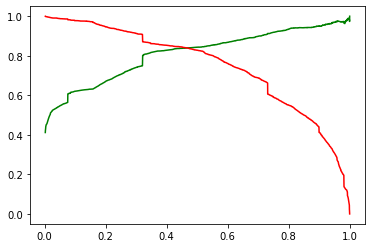

In [180]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [181]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website']])

In [182]:
X_test = X_test[col6]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

3271    0.209237
1490    0.831901
7936    0.181118
4216    0.998975
3830    0.211749
dtype: float64

In [183]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(Y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [184]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [185]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.209237
1,1,1490,0.831901
2,0,7936,0.181118
3,1,4216,0.998975
4,0,3830,0.211749


In [186]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.209237
1,1,1490,0.831901
2,0,7936,0.181118
3,1,4216,0.998975
4,0,3830,0.211749


In [187]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [188]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.209237,0
1,1,1490,0.831901,1
2,0,7936,0.181118,0
3,1,4216,0.998975,1
4,0,3830,0.211749,0


In [189]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8727272727272727

In [190]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1002,  142],
       [  89,  582]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)


0.8673621460506706

In [192]:
# Let us calculate specificity
TN / float(TN+FP)

0.8758741258741258

In [193]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [194]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,0,3271,0.209237,0,21
1,1,1490,0.831901,1,83
2,0,7936,0.181118,0,18
3,1,4216,0.998975,1,100
4,0,3830,0.211749,0,21
